In [26]:
from scipy.optimize import minimize, root, curve_fit
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import norm


In [27]:
import sys
sys.executable

'/Users/Ryan/anaconda3/envs/py27/bin/python'

In [28]:
def f(x):
    return x**2 + 10*np.sin(x)

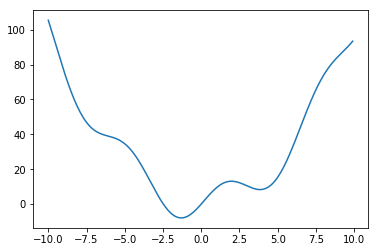

In [29]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, f(x)) 
plt.show()

In [34]:
result = minimize(f, x0=0)
result.x[0]

-1.3064401160169776

In [40]:
res = minimize(f, x0=3, method="L-BFGS-B")
res.x[0]

3.8374670868890486

In [35]:
guess = 0
x = minimize(f,guess,method = "bfgs")
print "An argument x that minimizes f(x), at least locally, is", x.x[0]

An argument x that minimizes f(x), at least locally, is -1.3064401160169776


In [41]:
guess = 1
x = root(f,guess)
print "An argument x that zeroes f(x) is", x.x[0]

An argument x that zeroes f(x) is 0.0


In [42]:
guess = -2.5
x = root(f,guess)
print "An argument x that zeroes f(x) is", x.x[0]

An argument x that zeroes f(x) is -2.479481833541344


[ 1.00255198 10.20406254]


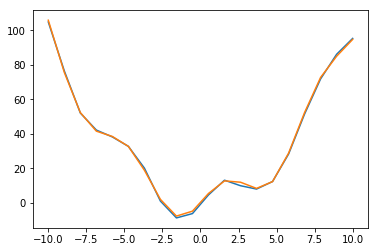

In [43]:
xdata = np.linspace(-10, 10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size) # noise added to prevent perfect fit
def f2(x, a, b):
    return a*x**2 + b*np.sin(x)
guess = [2,2]
p, pc = curve_fit(f2,xdata,ydata,guess)
print p

plt.plot(xdata,ydata,xdata,f2(xdata,p[0],p[1])) 

In [44]:
objective = lambda z: norm(f2(xdata,z[0],z[1])-ydata,2)
print objective(p)
print objective(np.array([1,10])) # changing parameters slightly makes fit worse

4.03859049059
4.12607139377


In [46]:
x = minimize(objective,np.array(guess))
p2 = x.x
print objective(p2)
print np.allclose(p,p2)

4.03859049059
True


In [51]:
objective = lambda z: norm(f2(xdata,z[0],z[1])-ydata,1)
x = minimize(objective,np.array(guess))
p3 = x.x
print objective(p3)

15.236284784983383


Text(0.5,1,u'Fitting Data with Function of Form $ax^2 + b\\sin(x)$')

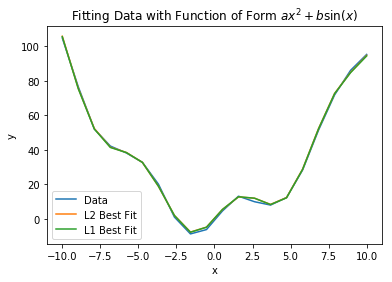

In [52]:
plt.plot(xdata,ydata,xdata,f2(xdata,p2[0],p2[1]),xdata,f2(xdata,p3[0],p3[1])) 
plt.legend(["Data","L2 Best Fit", "L1 Best Fit"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("Fitting Data with Function of Form $ax^2 + b\sin(x)$")